#EDA | Assignment

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


In [11]:
import pandas as pd

# Load dataset from local path after downloading from the provided link
# Assuming the file is named 'Bike Details.csv' and is in the current directory
file_path = '/content/BIKE DETAILS (1).csv' # Updated file path for Colab

# Read the dataset
df = pd.read_csv(file_path)

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

Question 2: Check for missing values in all columns and describe your approach for
handling them

In [12]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# Approach to handle missing values:
# 1. If missing values are very few, consider dropping those rows.
# 2. If missing values are significant, consider imputing:
#    - For numerical columns: mean, median, or mode imputation.
#    - For categorical columns: mode imputation or a new category like 'Unknown'.
# 3. If a column has too many missing values, consider dropping the column.
# 4. Use domain knowledge to decide the best imputation strategy.

# Example: Impute missing numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if missing_values[col] > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Example: Impute missing categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if missing_values[col] > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values in each column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64

Missing values after imputation:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-2414491312.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend

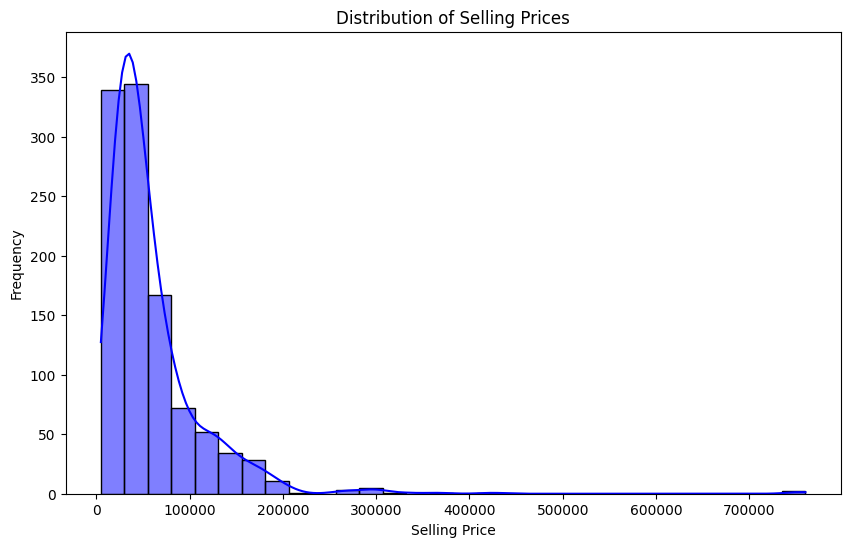

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Selling_Price' with the actual column name for selling prices in your dataset
price_col = 'selling_price'

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df[price_col], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


/tmp/ipython-input-4023211814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_col, y=price_col, data=avg_price_by_seller, palette='viridis')


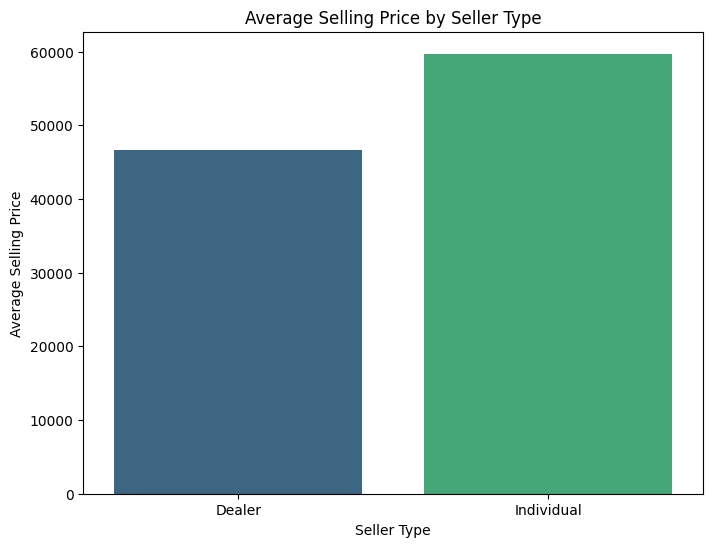

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'seller_type' and 'Selling_Price' with actual column names if different
seller_col = 'seller_type'
price_col = 'selling_price' # Corrected column name

# Calculate average selling price per seller type
avg_price_by_seller = df.groupby(seller_col)[price_col].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=seller_col, y=price_col, data=avg_price_by_seller, palette='viridis')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


/tmp/ipython-input-375292006.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ownership_col, y=km_driven_col, data=avg_km_by_owner, palette='coolwarm')


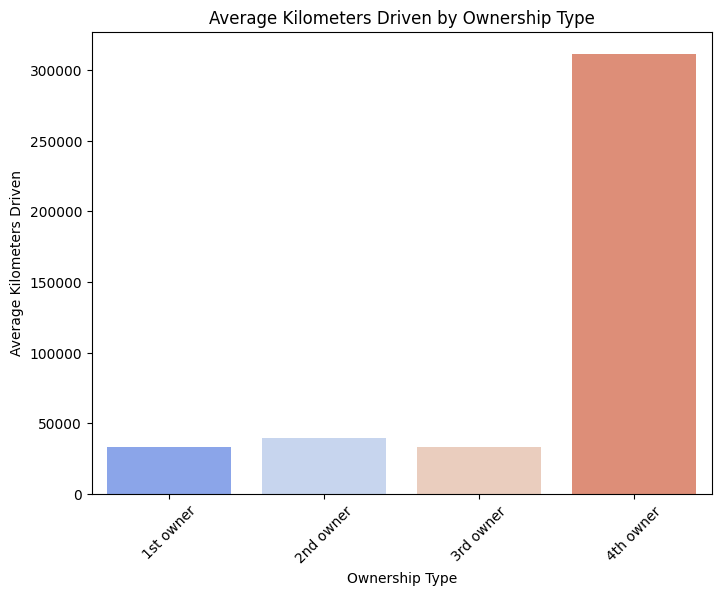

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'owner' and 'km_driven' with actual column names if different
ownership_col = 'owner'
km_driven_col = 'km_driven'

# Compute average km_driven for each ownership type
avg_km_by_owner = df.groupby(ownership_col)[km_driven_col].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=ownership_col, y=km_driven_col, data=avg_km_by_owner, palette='coolwarm')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [20]:
# Summary statistics before removing outliers
print("Summary statistics before removing outliers:")
print(df['km_driven'].describe())

# Calculate Q1, Q3 and IQR for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataframe to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary statistics after removing outliers:")
print(df_no_outliers['km_driven'].describe())


Summary statistics before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

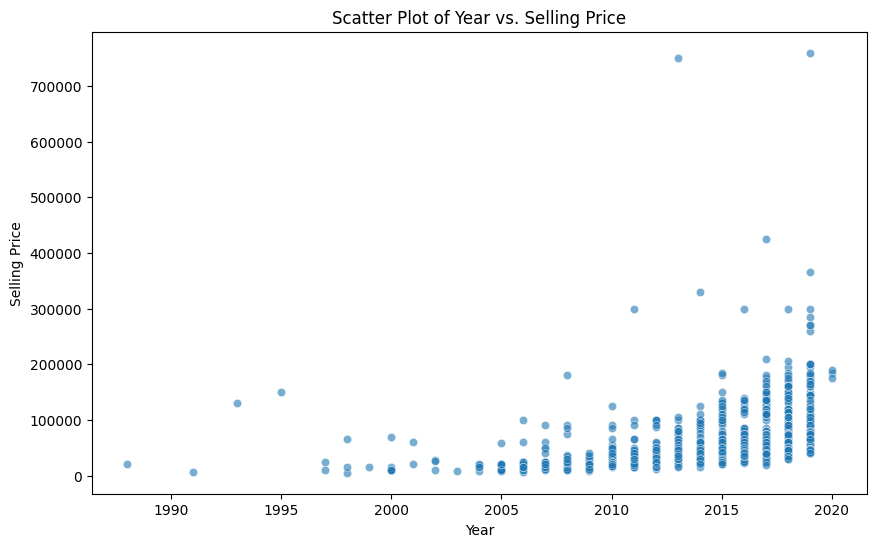

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'year' and 'Selling_Price' with actual column names if different
year_col = 'year'
price_col = 'selling_price'

plt.figure(figsize=(10,6))
sns.scatterplot(x=df[year_col], y=df[price_col], alpha=0.6)
plt.title('Scatter Plot of Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [23]:
# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the resulting DataFrame
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

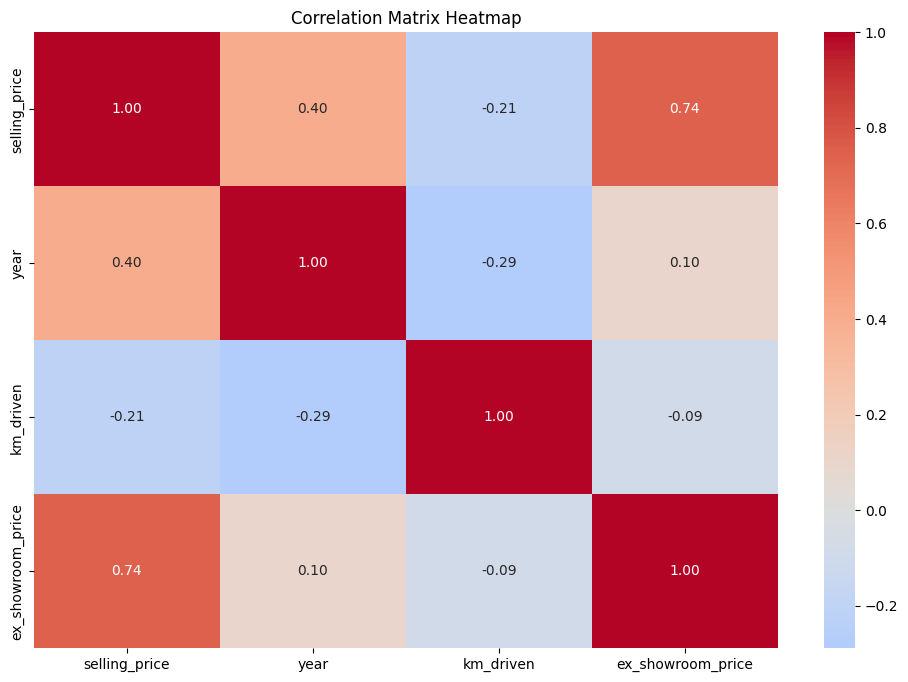

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

**Summary Report**

Based on the exploratory data analysis performed on the Bike Details dataset, here is a summary of the findings:

**Most Important Factors Affecting a Bike's Selling Price:**

From the analysis, the following factors appear to be the most important in affecting a bike's selling price:

*   **Ex-Showroom Price:** The correlation heatmap showed a strong positive correlation (0.74) between `ex_showroom_price` and `selling_price`. This suggests that the original price of the bike is a significant determinant of its selling price in the used market.
*   **Year:** There is a moderate positive correlation (0.40) between `year` and `selling_price`, as also observed in the scatter plot. This indicates that newer bikes tend to command higher selling prices.
*   **Seller Type:** The bar plot of average selling price by seller type showed that bikes sold by 'Individual' sellers have a higher average selling price compared to those sold by 'Dealer' sellers.

While `km_driven` has a weak negative correlation (-0.21) with `selling_price`, suggesting that bikes with more kilometers driven might sell for slightly less, its impact appears less significant compared to the ex-showroom price and year.

**Data Cleaning and Feature Engineering Performed:**

During the analysis, the following data cleaning and feature engineering steps were performed:

*   **Handling Missing Values:** Missing values in the `ex_showroom_price` column were imputed with the median value of that column.
*   **Outlier Detection and Removal:** The IQR method was used to detect and remove outliers from the `km_driven` column.
*   **Feature Engineering (One-Hot Encoding):** The categorical column `seller_type` was converted into a numeric format using one-hot encoding to prepare it for potential modeling or further analysis.